# Histogram

```warning
The hist package is still under active development, the usage and contents are in flux.
```

In [1]:
import hist

In [2]:
# fill the axes
h = hist.Hist(
    hist.axis.Regular(50, -5, 5, name="S", label="s [units]", underflow=False, overflow=False),
    hist.axis.Regular(50, -5, 5, name="W", label="w [units]", underflow=False, overflow=False)
)

In [3]:
# add the axes
h = hist.Hist.Reg(
    50, -5, 5, name="S", label="s [units]", underflow=False, overflow=False
).Reg(50, -5, 5, name="W", label="w [units]", underflow=False, overflow=False)

Note that you cannot add axes after you have initialized the Hist.

In [4]:
import numpy as np

s_data = np.random.normal(size=50_000)
w_data = np.random.normal(size=50_000)

# normal fill
h.fill(s_data, w_data)

# fill by names
h.fill(W=w_data, S=s_data)

Hist(
  Regular(50, -5, 5, underflow=False, overflow=False, metadata={'name': 'S', 'label': 's [units]'}),
  Regular(50, -5, 5, underflow=False, overflow=False, metadata={'name': 'W', 'label': 'w [units]'}),
  storage=Double()) # Sum: 100000.0

In [5]:
import matplotlib.pyplot as plt

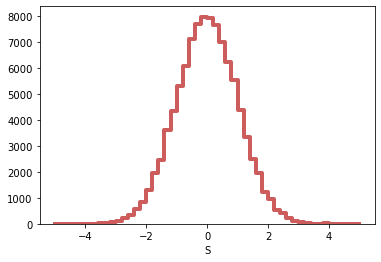

In [6]:
# plot1d
fig = plt.figure(figsize=(6, 4))
grid = fig.add_gridspec(5, 5, hspace=0, wspace=0)

ax = fig.add_subplot(grid[:, :])

ax = h.project("S").plot1d(ax=ax, ls='-', c="indianred", lw=4)
plt.show()

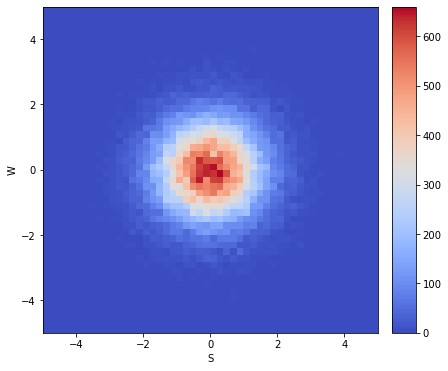

In [7]:
# plot2d
fig = plt.figure(figsize=(6, 6))
grid = fig.add_gridspec(5, 5, hspace=0, wspace=0)

ax = fig.add_subplot(grid[:, :])

ax = h.plot2d(ax=ax, cmap="coolwarm")
plt.show()

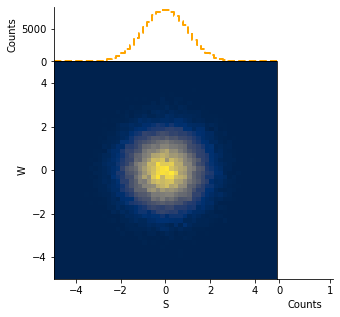

In [8]:
# plot2d_full
fig = plt.figure(figsize=(5, 5))
grid = fig.add_gridspec(5, 5, hspace=0, wspace=0)

ax1 = fig.add_subplot(grid[1:5, 0:4])
ax2 = fig.add_subplot(grid[0:1, 0:4], sharex=ax1)
ax3 = fig.add_subplot(grid[1:5, 4:5], sharey=ax1)

main_ax, top_ax, side_ax = h.plot2d_full(fig=fig, ax_dict=dict(main_ax=ax1, top_ax=ax2, side_ax=ax3),\
                                              main_cmap="cividis", top_ls="--",\
                                              top_color="orange", top_lw=2, side_ls=":",\
                                              side_lw=2, side_color="steelblue"
                                             )

plt.show()

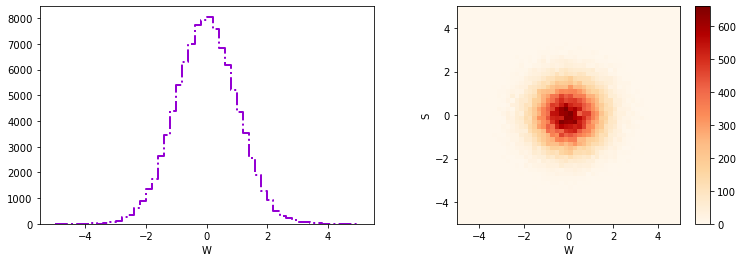

In [9]:
# auto-plot
fig = plt.figure(figsize=(8, 4))
grid = fig.add_gridspec(9, 10, hspace=0, wspace=0)

ax1 = fig.add_subplot(grid[:, 0:4])
ax2 = fig.add_subplot(grid[:, 5:])

h.project("W").plot(ax=ax1, c="darkviolet", lw=2, ls='-.')
h.project("W", "S").plot(ax=ax2, cmap="OrRd")
plt.show()

#### Via Plot Pull

Pull plot is commonly used in HEP studies, we provide a method for this specific type of plot called `.plot_pull()`, where you can pass in a Callable object and then we could fit it on the plot.

In [10]:
from uncertainties import unumpy as unp

def pdf(x, a=1/np.sqrt(2*np.pi), x0=0, sigma=1, offset=0):
    exp = unp.exp if a.dtype == np.dtype("O") else np.exp
    return a * exp(-(x-x0)**2/(2*sigma**2)) + offset

*(The uncertainty is non-significant as we filled a great quantities of observation points above.)*

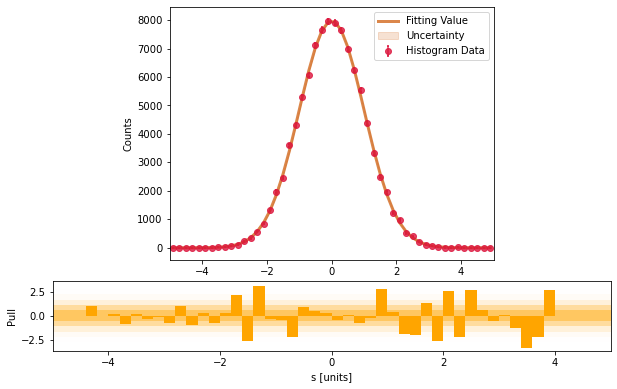

In [11]:
fig = plt.figure(figsize=(10, 8))
grid = fig.add_gridspec(5, 5, wspace=0.3, hspace=0.3)
ax = fig.add_subplot(grid[0:3, 1:4])
pull_ax = fig.add_subplot(grid[3:4, :], sharex=ax)

ax, pull_ax = h.project("S").plot_pull(pdf, fig=fig, ax_dict={"main_ax": ax, "pull_ax": pull_ax},\
                                            eb_ecolor='crimson', eb_mfc='crimson',\
                                            eb_mec='crimson', eb_fmt='o', eb_ms=6,\
                                            eb_capsize=1, eb_capthick=2, eb_alpha=.8,\
                                            vp_c='orange', vp_ls='-', vp_lw=2,\
                                            vp_alpha=.8, fp_c='chocolate', fp_ls='-',\
                                            fp_lw=3, fp_alpha=.8, bar_fc='orange',\
                                            pp_num=6, pp_fc='orange', pp_alpha=.618,\
                                            pp_ec=None, ub_alpha=.2
                                           )

plt.show()

#### Via Mplhep

[mplhep](https://github.com/scikit-hep/mplhep) is an important visualization tools in Scikit-Hep ecosystem. hist has integrate with mplhep and you can also plot using it. If you want more info about mplhep please visit the official repo to see it.

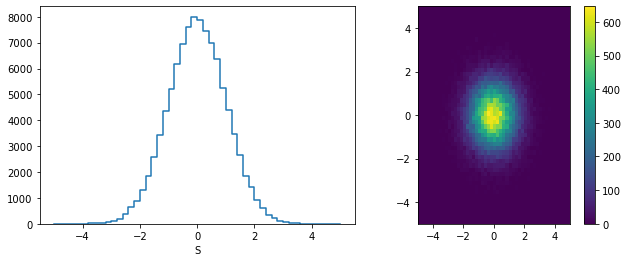

In [20]:
import mplhep

plt.subplot(121)
mplhep.histplot(h.project("S"))

plt.subplot(122)
mplhep.hist2dplot(h)

plt.show()